In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib import colors
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red':   [(0.0,  0.0, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  1.0, 1.0)],
         'green': [(0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)],
         'blue':  [(0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0)]})
plt.cm.register_cmap(cmap=cmap)

In [4]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [6]:
def classify(x, v1, v2, w):
    z1 = np.tanh(v1[0]+np.dot(x, v1[1:]))
    #print(z1)
    z2 = np.tanh(v2[0]+np.dot(x, v2[1:]))
    #print(z2)
    y = 1./(1+np.exp(-w[0]-np.dot(w[1:], [z1, z2])))
    return y

In [7]:
nx = ny = 200
x_min = y_min = -40
x_max = y_max = 40
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

In [8]:
v1 = [-.3, .2, -.4]
v2 = [-.2, -.3, .1]
w = [.2, 1, 3]

In [9]:
D=np.c_[xx.ravel(), yy.ravel()]

In [10]:
p=np.array([classify(d, v1, v2, w) for d in D])
p=p.reshape(xx.shape)

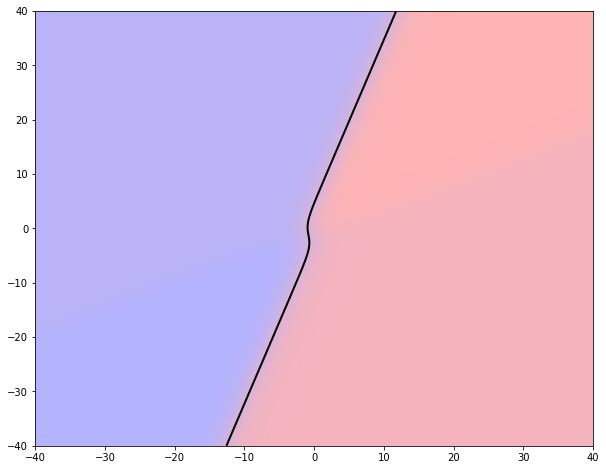

In [11]:
plt.pcolormesh(xx, yy, p, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, p, [0.5], linewidths=2., colors='k')

# Learning

In [12]:
X=[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2], [1, 3], [2, 3], [3, 3], [4, 1], [4, 2], [4, 3]]

In [13]:
t=[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [19]:
# initialize
v1 = [.1, -.1, .1]
v2 = [.1, .1, -.1]
w = [-.1, .1, .1]

In [27]:
lr = 0.0075
alpha = 0.0
for _ in range(1000):
    total_error = 0
    for i in range(len(X)):
        x=X[i]
        #print(classify(x, v1, v2, w))
        # feedforward
        z1 = np.tanh(v1[0]+np.dot(x, v1[1:]))
        z2 = np.tanh(v2[0]+np.dot(x, v2[1:]))
        y = 1./(1+np.exp(-w[0]-np.dot(w[1:], [z1, z2])))
        # backward
        y_error = (1-t[i])*y - t[i]*(1-y)
        total_error -= (1-t[i])*np.log(1-y) + t[i]*np.log(y)
        #print(y_error)
        #print()
        z1_error = y_error*w[1]*(1-z1)*(1+z1)
        z2_error = y_error*w[2]*(1-z2)*(1+z2)
        # update weights
        w[0] = w[0] - lr*y_error*1 - lr*alpha*w[0]
        w[1] = w[1] - lr*y_error*z1 - lr*alpha*w[1]
        w[2] = w[2] - lr*y_error*z2 - lr*alpha*w[2]
        v1[0] = v1[0] - lr*z1_error*1 - lr*alpha*v1[0]
        v1[1] = v1[1] - lr*z1_error*x[0] - lr*alpha*v1[1]
        v1[2] = v1[2] - lr*z1_error*x[1] - lr*alpha*v1[2]
        v2[0] = v2[0] - lr*z2_error*1 - lr*alpha*v2[0]
        v2[1] = v2[1] - lr*z2_error*x[0] - lr*alpha*v2[1]
        v2[2] = v2[2] - lr*z2_error*x[1] - lr*alpha*v2[2]
print("TE: \t%0.3f" %total_error)

TE: 	0.530


In [28]:
for x in X:
    print(classify(x, v1, v2, w))

0.0013178772883605618
0.04478279889063823
0.0018905783994233962
0.007400149370585304
0.05235441382756635
0.08150479116527402
0.9313000903425378
0.9282783848969098
0.9903928101722502
0.9160911332065251
0.9264172941728243
0.9991946529352908


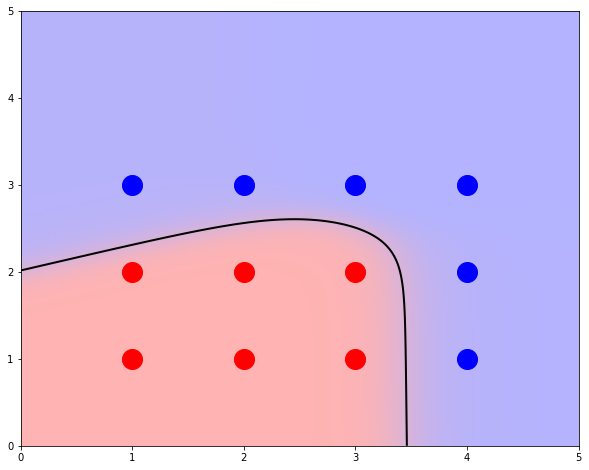

In [29]:
nx = ny = 200
x_min = y_min = 0
x_max = y_max = 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
D=np.c_[xx.ravel(), yy.ravel()]
p=np.array([classify(d, v1, v2, w) for d in D])
p=p.reshape(xx.shape)
for i in range(len(X)):
    if t[i] == 1:
        plt.plot(X[i][0], X[i][1], 'o', color='blue', markersize=20)
    else:
        plt.plot(X[i][0], X[i][1], 'o', color='red', markersize=20)

plt.pcolormesh(xx, yy, p, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, p, [0.5], linewidths=2., colors='k')

In [30]:
nx = ny = 200
x_min = y_min = 0
x_max = y_max = 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
D=np.c_[xx.ravel(), yy.ravel()]

In [31]:
Dp = []
t = []

In [32]:
for d in D:
    if d[0] > 2 and d[0] < 3 and d[1] > 2 and d[1] < 3:
        Dp.append(d)
        t.append(1)
    elif (d[0] < 1 or d[0] > 4) or (d[1] < 1 or d[1] > 4):
        if np.random.rand() < 0.05:
            Dp.append(d)
            t.append(0)

In [33]:
np.mean(t)

0.554016620498615

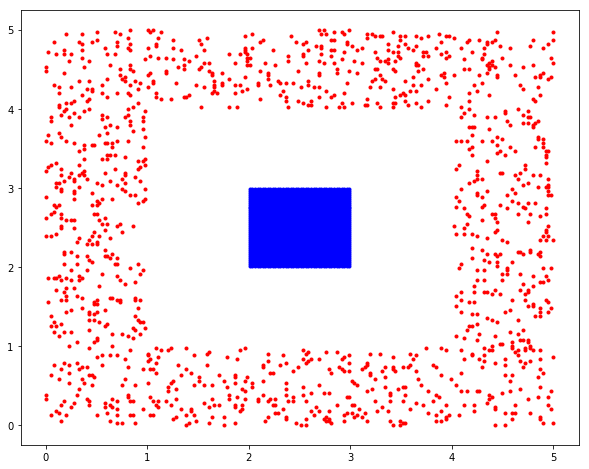

In [35]:
X=Dp
for i in range(len(X)):
    if t[i] == 1:
        plt.plot(X[i][0], X[i][1], 'o', color='blue', markersize=3)
    else:
        plt.plot(X[i][0], X[i][1], 'o', color='red', markersize=3)

In [36]:
num_hidden = 4

In [37]:
def classify2(x, vs, w):
    nh = len(vs)
    zs = []
    for i in range(nh):
        v = vs[i]
        zs.append(np.tanh(v[0] + np.dot(v[1:], x)))
    y = 1./(1.+np.exp(-w[0]-np.dot(w[1:], zs)))
    return y

In [38]:
X=Dp

In [39]:
vs = []
w = []
w.append(np.random.rand()*2-1)
for _ in range(num_hidden):
    v = []
    for _ in range(3):
        v.append(np.random.rand()*2-1)
    vs.append(v)
    w.append(np.random.rand()*2-1)

In [40]:
lr = 0.005
alpha = 0.0

try:
    for _ in range(100):
        total_error = 0
        for i in range(len(X[:])):
            x=X[i]
            #print(classify(x, v1, v2, w))
            # feedforward
            zs = []
            for j in range(num_hidden):
                v = vs[j]
                zs.append(np.tanh(v[0] + np.dot(x, v[1:])))
            
            #print()
            #print(i)
            #print(zs)
            
            s = -w[0]-np.dot(w[1:], zs)
            y = 1./(1+np.exp(s))
            y = np.clip(y, 1e-10, 1-1e-10)
            
            #print(y)
            
            # backward
            y_error = (1-t[i])*y - t[i]*(1-y)
            total_error -= (1-t[i])*np.log(1-y) + t[i]*np.log(y)
            
            #print(y_error)
            
            z_errors = []
            for j in range(num_hidden):
                z_errors.append(y_error*w[j+1]*(1-zs[j])*(1+zs[j]))
            
            #print(z_errors)
            
            # update weights
            w[0] = w[0] - lr*y_error*1 - lr*alpha*w[0]
            for j in range(num_hidden):
                w[j+1] = w[j+1] - lr*y_error*zs[j] - lr*alpha*w[j+1]
                v = vs[j]
                v[0] = v[0] - lr*z_errors[j]*1 - lr*alpha*v[0]
                v[1] = v[1] - lr*z_errors[j]*x[0] - lr*alpha*v[1]
                v[2] = v[2] - lr*z_errors[j]*x[1] - lr*alpha*v[2]
except RuntimeWarning:
    print(i)
    print(y_error)
    print(zs)
print("TE: \t%0.3f" %total_error)

TE: 	74.878


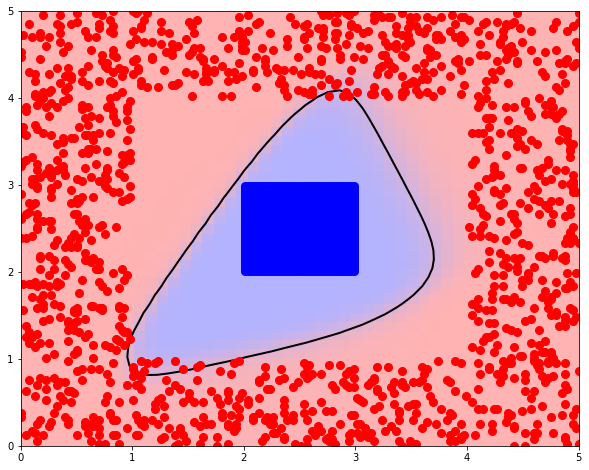

In [49]:
nx = ny = 50
x_min = y_min = 0
x_max = y_max = 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
D=np.c_[xx.ravel(), yy.ravel()]
p=[classify2(d, vs, w) for d in D]
p=np.array(p)
p=p.reshape(xx.shape)

X=Dp
for i in range(len(X)):
    if t[i] == 1:
        plt.plot(X[i][0], X[i][1], 'o', color='blue', markersize=8)
    else:
        plt.plot(X[i][0], X[i][1], 'o', color='red', markersize=8)

plt.pcolormesh(xx, yy, p, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, p, [0.5], linewidths=2., colors='k')

In [42]:
classify2([2.5, 2.5], vs, w)

0.013440802935618522

In [43]:
classify2([0, 0], vs, w)

0.0077729990819331175

In [44]:
classify2([5, 5], vs, w)

0.0027822333726354952

In [47]:
vs = [[-1.4395892690558445, -0.6994640575516157, 2.4763238083720416],
 [-5.832152599201117, 1.2801824017482004, 0.5347291187258975],
 [1.0461615987520945, -3.683980121271858, 2.024501795098323],
 [0.35189345674770495, 1.577772129315875, 1.1894009103278471]]

In [48]:
w = [-5.266158175713795,
 4.933742705326487,
 -5.537202130283304,
 -5.736361194605192,
 -4.393480175813042]